<a href="https://colab.research.google.com/github.com/abelranni/modelos-de-simulacion/blob/main/02_variables_aleatorias/src/02.06E_transformada_inversa_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Transformada Inversa de Distribución Continua

El método de la transformada inversa puede utilizarse para simular variables aleatorias continuas, lo cual se logra mediante la función acumulada F(x) y la generación de números pseudoaleatorios $r_i~ U (0 ,1)$.
El método consiste en:

1. Definir la función de densidad $F(x)$ que represente la variable a modelar.
2. Calcular la función acumulada $F(x)$.
3. Despejar la variable aleatoria x y obtener la función acum ulada inversa $F(x)^-1$
4. Generar las variables aleatorias x, sustituyendo valores con números pseudoaleatorios $r_i ~U(0,1)$ en la función acum ulada inversa

## Distribución Exponencial

La distribución exponencial es una distribución de probabilidad continua que modela el tiempo entre eventos en un proceso de Poisson. Se define por un parámetro: lambda (tasa). La función de densidad de probabilidad (PDF) de la distribución exponencial, que está dada por:

$$f(x) = \lambda e^{-\lambda x}$$

La función de distribución acumulativa (CDF) de la distribución exponencial, que está dada por:

$$F(x) = 1 - e^{-\lambda x}$$

La función de distribución acumulativa inversa (CDF inversa) de la distribución exponencial, que está dada por:

$$F^{-1}(u) = -\frac{\ln(1 - u)}{\lambda}$$

donde lambda es el parámetro de la distribución exponencial y u es un número aleatorio uniformemente distribuido entre 0 y 1.


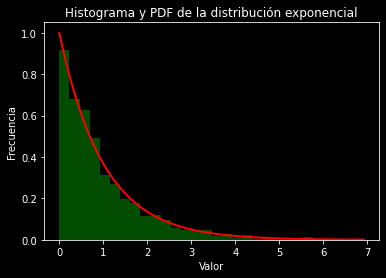

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def exponencial_inversa(lambda_param, size=1):
    numeros_aleatorios = np.random.rand(size)
    return -np.log(1 - numeros_aleatorios) / lambda_param

# Parámetros
lambda_param = 1.0
n_muestras = 1000

# Generar valores aleatorios
valores_aleatorios = exponencial_inversa(lambda_param, n_muestras)

# print(valores_aleatorios)

# Crear histograma
plt.hist(valores_aleatorios, bins=30, density=True, alpha=0.6, color='g')

# Crear gráfica de la función de densidad de probabilidad (PDF)
x = np.linspace(0, max(valores_aleatorios), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r', linewidth=2)

plt.title('Histograma y PDF de la distribución exponencial')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()


En este ejemplo, utilizamos la función np.random.rand(size) de NumPy para generar números aleatorios uniformemente distribuidos entre 0 y 1, y luego aplicamos la CDF inversa de la distribución exponencial para obtener los valores aleatorios con dicha distribución.

## 2. Transformada Inversa de Distribución Discreta

El método de la transformada inversa también puede emplearse para simular variables aleatorias de tipo discreto, como en las distribuciones de Poisson, de Bernoulli, binomial, geométrica, discreta general, etcétera.
La generación se lleva a cabo a través de la probabilidad acumulada P(x) y la generación de números pseudoaleatorios $r_i ~U(0,1)$. El métotdo consiste en:

1. Calcular todos los valores de la distribución de probabilidad p(x) de la variable a modelar.
2. Calcular todos los valores de la distribución acumulada P(x).
3. Generar números pseudoaleatorios $r_i ~U(0,1)$.
4. Comparar con el valor de P(x) y determinar qué valor de x corresponde a P(x).

## Distribución de Poisson

Para generar números aleatorios siguiendo una distribución de Poisson usando el método de la transformada inversa, hace falta implementar la función de distribución acumulativa inversa (CDF inversa) de la distribución de Poisson.

La función de masa de probabilidad de la distribución de Poisson es:

$$P(X=k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}$$

Donde lambda es el parámetro de la distribución de Poisson y k es un entero no negativo. Para usar la transformada inversa, primero hay que calcular la función de distribución acumulativa (CDF) y luego invertirla.
La función inversa sería:
$$F(k) = \sum_{i=0}^{k} \frac{e^{-\lambda} \cdot \lambda^i}{i!}$$

Dado que la CDF es discreta, no existe una función inversa analítica como en el caso de la distribución exponencial. Sin embargo, se puede usar un algoritmo iterativo para encontrar la CDF inversa, como se muestra en el código proporcionado más abajo. 
En términos generales, la idea es generar un número aleatorio u entre 0 y 1 y luego encontrar el mínimo k tal que F(k) >= u.

El algoritmo en pseudocódigo se vería así:

- Generar un número aleatorio u entre 0 y 1.
- Inicializar k = 0 y suma_prob = 0.
- Calcular prob = (e^(-lambda) * (lambda^k)) / k!.
- Incrementar suma_prob con prob.
- Si suma_prob >= u, devolver k. De lo contrario, incrementar k en 1 y repetir desde el paso 3.

En el caso del código proporcionado, el algoritmo iterativo para la CDF inversa de la distribución de Poisson se implementa en la función poisson_inversa.

En este ejemplo, generamos números aleatorios uniformemente distribuidos entre 0 y 1, y luego aplicamos la CDF inversa de la distribución de Poisson para obtener los valores aleatorios con dicha distribución.

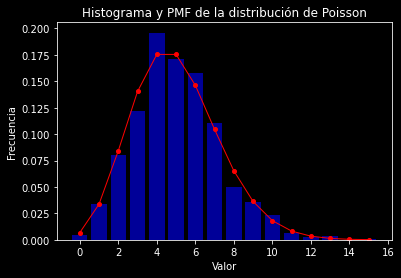

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

def poisson_inversa(lambda_param, size=1):
    numeros_aleatorios = np.random.rand(size)
    valores_aleatorios = np.zeros(size, dtype=int)

    for i, numero_aleatorio in enumerate(numeros_aleatorios):
        suma_prob = 0
        k = 0
        while suma_prob <= numero_aleatorio:
            prob = np.exp(-lambda_param) * (lambda_param ** k) / np.math.factorial(k)
            suma_prob += prob
            k += 1
        valores_aleatorios[i] = k - 1

    return valores_aleatorios

# Parámetros
lambda_param = 5.0
n_muestras = 1000

# Generar valores aleatorios
valores_aleatorios = poisson_inversa(lambda_param, n_muestras)

# print(valores_aleatorios)

# Crear histograma
bins = np.arange(valores_aleatorios.min(), valores_aleatorios.max() + 2) - 0.5
plt.hist(valores_aleatorios, bins=bins, density=True, alpha=0.6, color='b', rwidth=0.8)

# Crear gráfica de la función de masa de probabilidad (PMF)
x = np.arange(0, max(valores_aleatorios) + 1)
pmf = np.exp(-lambda_param) * (lambda_param ** x) / factorial(x)
plt.plot(x, pmf, 'ro', markersize=4, linestyle='-', linewidth=1)

plt.title('Histograma y PMF de la distribución de Poisson')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.show()
